### Read the station data from GHCN archive ###

Data obtained from http://www.ncdc.noaa.gov/cdo-web/

In [1]:
from __future__ import print_function
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
%matplotlib inline

In [2]:
def get_date(date_number):
    """
    Turn the int64 value from the DATE of GHCN into a pd.datetime
    """
    dstring = str(date_number)
    return pd.datetime(int(dstring[0:4]),int(dstring[4:6]),int(dstring[6:8]))

def get_df(fnm, var):
    """
    Create a dataframe for a single station, with a time index, for a single
    variable of data given as a key word (e.g. PRECIP, TMAX, TMIN).
    Requires file path and name (fnm).
    """
    df = pd.read_csv(fnm)
    dt_indx = [get_date(date) for date in df.DATE]   
    return pd.DataFrame(data=df[var].values,index=dt_indx,columns=[df.STATION[0][6:]])

def get_combined_df(fpth, var):
    """
    From a given file path, and variable, extract data from all .csv files, and
    place in a single dataframe object.
    """
    flist = glob.glob(fpth)
    df_dic = {}
    for f in flist:
        df_dic[f[5:]] = get_df(fnm = f, var = var)
    #mask = df_dic != -9999
    #df_dic[mask] = np.nan 
    #mx = ma.MaskedArray(df_dic, mask != -9999.)
    return pd.concat([df_dic[key] for key in df_dic.keys()],axis=1)

In [3]:
%%time
df_tmax = get_combined_df(fpth="Data/*.csv",var="TMAX")
df_tmin = get_combined_df(fpth="Data/*.csv",var="TMIN")
df_prcp = get_combined_df(fpth="Data/*.csv",var="PRCP")

CPU times: user 11.8 s, sys: 549 ms, total: 12.4 s
Wall time: 13.3 s


In [4]:
X=pd.concat([df_prcp[key] for key in df_prcp.keys()],axis=1)
X.tail()

,KE000063612,KE000063740,TZ000063894,TZ000063756,KEM00063686,KE000063619,ET000063450,ET000063402,TZ000063862,ET000063403,...,KE000063624,KE000063661,KE000063661,RWM00064387,ET000063331,KEM00063741,TZ000063832,ET000063471,KE000063820,KE000063723
2015-08-28,-9999,-9999,0,-9999,NaN,NaN,-9999,0,-9999,0,...,NaN,0,0,-9999,NaN,NaN,-9999,-9999,20,NaN
2015-08-29,-9999,-9999,13,-9999,NaN,NaN,-9999,79,-9999,41,...,NaN,0,0,-9999,NaN,NaN,-9999,10,0,NaN
2015-08-30,-9999,-9999,61,-9999,NaN,NaN,-9999,170,-9999,10,...,NaN,-9999,-9999,-9999,-9999,NaN,-9999,89,20,NaN
2015-08-31,NaN,0,0,-9999,NaN,NaN,71,20,-9999,51,...,NaN,-9999,-9999,-9999,NaN,NaN,-9999,20,0,NaN
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
mask = X == -9999.
X[mask] = np.nan
X[mask].tail()

,KE000063612,KE000063740,TZ000063894,TZ000063756,KEM00063686,KE000063619,ET000063450,ET000063402,TZ000063862,ET000063403,...,KE000063624,KE000063661,KE000063661,RWM00064387,ET000063331,KEM00063741,TZ000063832,ET000063471,KE000063820,KE000063723
2015-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
X.mean()

KE000063612    11.041479
KE000063740    24.858084
TZ000063894    38.560235
TZ000063756    33.348724
KEM00063686    40.579483
KE000063619    16.248980
ET000063450    35.708177
ET000063402    44.846159
TZ000063862    42.515859
ET000063403    63.094847
SU000062941    26.882264
KEM00063799    40.118929
KE000063661    43.980985
KE000063661    51.550249
KE000063624     8.235791
KE000063661    43.980985
KE000063661    51.550249
RWM00064387    48.927549
ET000063331    34.940213
KEM00063741    43.756026
TZ000063832    29.406379
ET000063471    20.316994
KE000063820    34.229949
KE000063723    12.731436
dtype: float64

In [7]:
X.describe()

,KE000063612,KE000063740,TZ000063894,TZ000063756,KEM00063686,KE000063619,ET000063450,ET000063402,TZ000063862,ET000063403,...,KE000063624,KE000063661,KE000063661,RWM00064387,ET000063331,KEM00063741,TZ000063832,ET000063471,KE000063820,KE000063723
count,6437.000000,16996.000000,14651.000000,17197.000000,4718.000000,3920.00000,12230.000000,14385.000000,2743.000000,14128.000000,...,15272.000000,9361.000000,3015.000000,3492.000000,13431.000000,3402.000000,15803.000000,14505.000000,18004.000000,16659.000000
mean,11.041479,24.858084,38.560235,33.348724,40.579483,16.24898,35.708177,44.846159,42.515859,63.094847,...,8.235791,43.980985,51.550249,48.927549,34.940213,43.756026,29.406379,20.316994,34.229949,12.731436
std,79.654863,92.678614,142.881680,100.136722,116.756942,74.11375,86.099521,83.684615,182.352268,108.243811,...,53.515774,127.970573,110.720075,153.874974,79.123712,150.616240,83.861817,67.802102,104.435343,80.163615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4.000000,0.000000,10.000000,...,0.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,5.000000,10.000000,13.000000,30.000000,0.00000,41.000000,56.000000,5.000000,85.000000,...,0.000000,41.000000,61.000000,41.000000,34.000000,20.000000,10.000000,0.000000,18.000000,0.000000
max,2997.000000,3515.000000,4399.000000,2799.000000,3800.000000,1676.00000,3703.000000,2802.000000,3396.000000,1699.000000,...,1821.000000,4900.000000,2311.000000,2901.000000,2921.000000,4618.000000,1618.000000,1521.000000,2330.000000,4625.000000


In [96]:
#X[X > 500.]

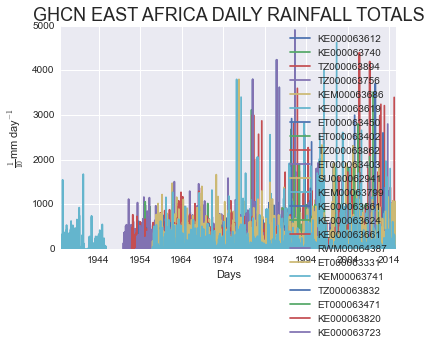

In [97]:
plt.plot(X.index, X.values)
plt.ylabel(r"$\frac{1}{10}$mm day$^{-1}$")
plt.xlabel(r"Days")
plt.legend(df_prcp.keys())
plt.title('GHCN EAST AFRICA DAILY RAINFALL TOTALS', fontsize=18)

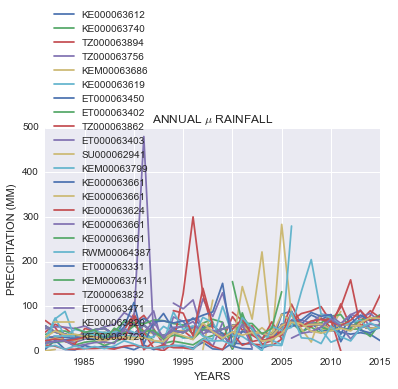

In [66]:
### Annual Mean ('A') Rainfall Pattern using Resampling.###
X_mm = X.resample('A')#, how=['mean', np.min, np.max])
#X_mm['1961':'2015'].plot(subplots=True)
X_mm['1981':'2015'].plot()
plt.title("ANNUAL $\mu$ RAINFALL")
plt.ylabel("PRECIPITATION (MM)")
plt.xlabel("YEARS")

In [36]:
X_mm.ET000063331

1935-12-31           NaN
1936-12-31           NaN
1937-12-31           NaN
1938-12-31           NaN
1939-12-31           NaN
1940-12-31           NaN
1941-12-31           NaN
1942-12-31           NaN
1943-12-31           NaN
1944-12-31           NaN
1945-12-31           NaN
1946-12-31           NaN
1947-12-31           NaN
1948-12-31           NaN
1949-12-31           NaN
1950-12-31           NaN
1951-12-31           NaN
1952-12-31           NaN
1953-12-31     36.590659
1954-12-31     38.339726
1955-12-31     36.690411
1956-12-31     30.402740
1957-12-31     31.421918
1958-12-31     35.263736
1959-12-31     37.547945
1960-12-31     27.598930
1961-12-31     33.375796
1962-12-31      0.000000
1963-12-31     12.217391
1964-12-31     54.583832
                 ...    
1986-12-31     25.953425
1987-12-31     31.071233
1988-12-31     29.836066
1989-12-31     53.636364
1990-12-31    108.385965
1991-12-31     15.000000
1992-12-31     65.250000
1993-12-31     66.900990
1994-12-31     62.458647


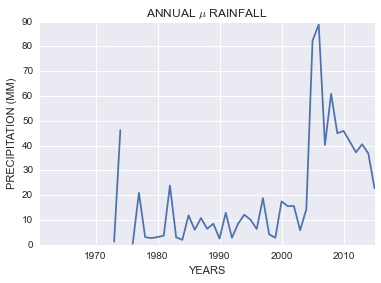

In [117]:
X_mm.KE000063612['1961':'2015'].plot()
#plt.plot(X_mm.ET000063331)
plt.title("ANNUAL $\mu$ RAINFALL")
plt.ylabel("PRECIPITATION (MM)")
plt.xlabel("YEARS")

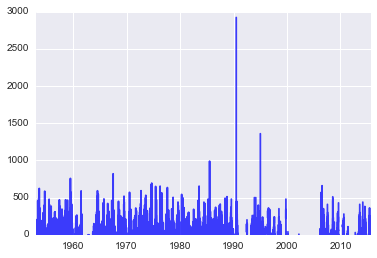

In [69]:
mask = df_prcp.ET000063331 != -9999
plt.plot(df_prcp.ET000063331.index[mask], df_prcp.ET000063331[mask].values,'b',alpha=0.75)

In [81]:
#DOY mean (μ) 
doy_mean=[]
for doy in range(366):
    index = X.index.dayofyear == doy+1 
    doy_mean.append(np.nanmean(X[index]))

In [94]:
doy_mean[0]

21.056013179571664

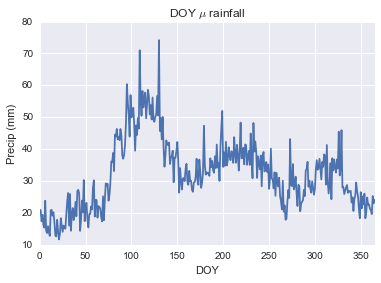

In [82]:
plt.errorbar(range(366),doy_mean,xerr=None)
plt.xlim(0,max(range(366)))
plt.title("DOY $\mu$ rainfall")
plt.ylabel("Precip (mm)")
plt.xlabel("DOY")

In [110]:
###Calculate monthly anomalies
##  Anomalies = Observation - Climatology

anomalies = []
for n,day in enumerate(X.values):
    #print("Index: {0} Date: {1} Value: {0:3.3f}".format(n,X.index[n].date(),day[0]))
    doyi = X.index[n].dayofyear -1 # Create an index to call doy_mean
    #print(n, doy_mean[doyi])
    anomalies.append(day - doy_mean[doyi])

In [113]:
anomalies[0]

array([         nan,          nan,          nan,          nan,
                nan, -21.05601318,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan])

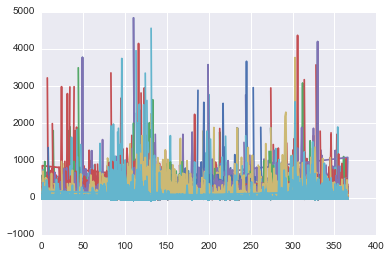

In [116]:
plt.plot(X.index.dayofyear,anomalies)
#X.index.anomaly['1961':'2015'].plot()

In [ ]:
# Exaple of how to mask data and quick look
#mask = df.PRCP != -9999
#plt.plot(df.PRCP[mask])
#plt.show()

In [ ]:
#print(df.DATE[0])
#print(type(df.DATE[0]))
#df.DATE[0]